In [6]:
import matplotlib.pyplot as plt
import numpy as np
from astroquery.sdss import SDSS
import ipywidgets as widgets
from IPython.display import clear_output
import sys

In [7]:
def search_the_sky(ra_low, ra_high, dec_low, dec_high, step_size=1):
    """
    This function loops through an area of the sky that you specify, and draws from the SDSS Star table to plot both a color-magnitude diagram and a spatial plot, and prompts you to identify areas that have globular clusters. It returns a list of the coordinates (RA and Dec) that you pick out as interesting
    Arguments:
    <ra_low>: the lower RA limit to scan through
    <ra_high>: the upper RA limit to scan through
    <dec_low>: the lower declination limit to scan through
    <dec_high>: the upper declination limit to scan through
    [step_size]: the angular side length of each 'square' you view, in degrees (default=1)
    """
    query = """
SELECT
  ra,dec,
  dered_g as g, dered_r as r,
  err_g, err_r,
  flags
  
FROM
  Star
  
WHERE
  g - r BETWEEN -0.5 AND 2.5
  AND g BETWEEN 14 and 24
  AND ra BETWEEN {} and {}
  AND dec Between {} and {}
"""
    interesting_coords = []
    ra_saved = []
    dec_saved = []
    for i in np.arange(ra_low, ra_high, step_size):
        for j in np.arange(dec_low, dec_high, step_size):
            temp_data = SDSS.query_sql(query.format(i, i+step_size, j, j+step_size), timeout=1000)
            if str(type(temp_data)) != "<class 'NoneType'>":
                
                fig,ax = plt.subplots(1, 2, figsize=(20,10))
                ax[0].hexbin(temp_data['g'] - temp_data['r'], temp_data['g'],gridsize=150)
                ax[0].set_ylim(24, 14)
                ax[0].set_xlabel('g-r color', fontsize=15)
                ax[0].set_ylabel('g magnitude', fontsize=15)
                ax[0].set_title('Color-Magnitude Hess Plot', fontsize=15)
                ax[1].scatter(temp_data['ra'], temp_data['dec'], marker='.', s=0.2, color='black')
                ax[1].set_aspect('equal')
                ax[1].set_title('Locations of stars in sky', fontsize=15)
                ax[1].set_xlabel('Right Ascension', fontsize=15)
                ax[1].set_ylabel('Declination', fontsize=15)
                plt.show()
                try:
                    interesting_coords.append(float(input(
                        "RA: "+str(i)+
                        " Dec: "+str(j)+
                        " Does this look like there's a globular cluster? 1 for yes, 2 for no, 3 to quit: "
                    )))
                    if interesting_coords[-1] == 1:
                        ra_saved.append(i)
                        dec_saved.append(j)
                    elif interesting_coords[-1] == 2:
                        pass
                    elif interesting_coords[-1] == 3:
                        coords_of_interest = np.array([(ra_saved[i], dec_saved[i]) for i in range(0, len(ra_saved))])
                        return coords_of_interest
                except ValueError:
                    coords_of_interest = np.array([(ra_saved[i], dec_saved[i]) for i in range(0, len(ra_saved))])
                    return coords_of_interest
                
                else:
                    pass
            else:
                pass
            clear_output(wait=True)
    coords_of_interest = np.array([(ra_saved[i], dec_saved[i]) for i in range(0, len(ra_saved))])
    return coords_of_interest

This cell selects a 2 degree wide section of the sky and loops over it, asking you to identify globular clusters.

There should be two in the coordinate range specified.

NOTE: Sometimes, this cell will stop working for no reason (I haven't figured out why yet). It seems to get better the more times you try it (i.e. the more you restart the kernel and try again). I do not yet understand why.

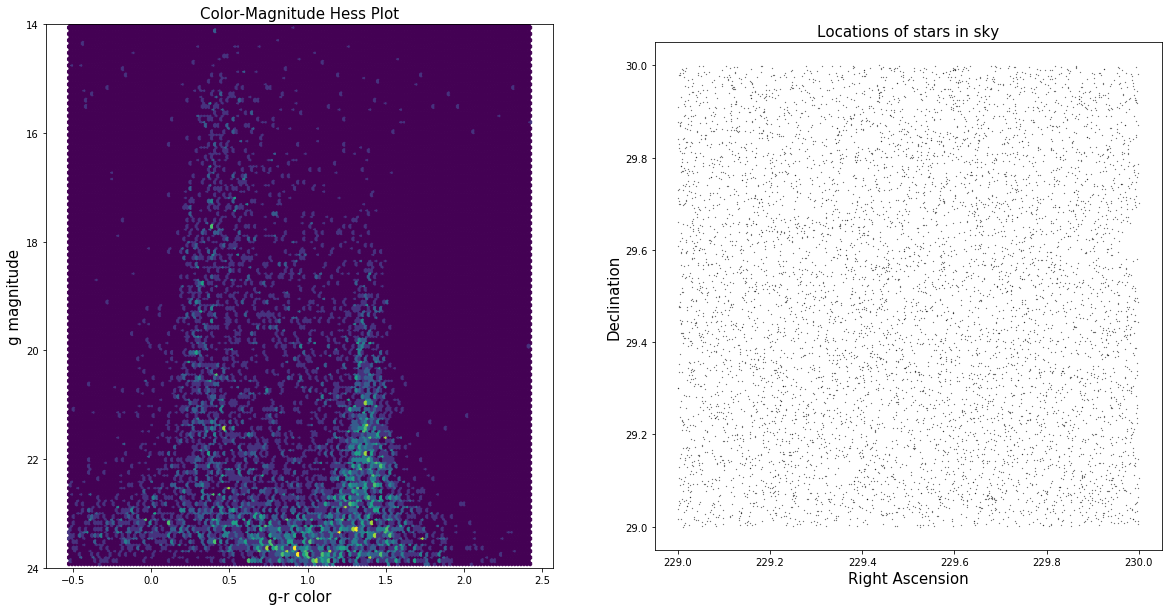

RA: 229 Dec: 29 Does this look like there's a globular cluster? 1 for yes, 2 for no, 3 to quit: 2


In [8]:
coords = search_the_sky(228,230,-15,10,1)

In [9]:
print("Here are the rough coordinates (RA & Dec) of all of the clusters you identified:")
coords

Here are the rough coordinates (RA & Dec) of all of the clusters you identified:


array([[228,  -1],
       [229,  -1],
       [229,   1],
       [229,   2]])

In [4]:
search_the_sky?

In [12]:

from IPython.display import display
button = widgets.Button(description="Click Me!")
button2 = widgets.Button(description="Hmmm!")
output = widgets.Output()

display(button, output)
display(button2, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()

Button(description='Hmmm!', style=ButtonStyle())

Output()